<a href="https://colab.research.google.com/github/Lenakirara/Data_Science_Alura/blob/main/notas_gerais_de_filmes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando notas gerais de filmes

## Objetivo
Nesse dataset iremos analisar e explorar alguns dados de forma descritiva, utilizando **pandas** e **seaborn**.


## Base de dados usada

Serão explorados rês arquivos de dados diferentes — GroupLens (MovieLens) e TMDb (The Movie Database), que contém informações de diversos filmes.

MovieLens<br>
https://grouplens.org/datasets/movielens/latest/
<br>
kaggle<br>
https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata



In [1]:
import pandas as pd
import io

from google.colab import files

In [2]:
uploaded = files.upload()

Saving tags.csv to tags.csv
Saving ratings.csv to ratings.csv
Saving movies.csv to movies.csv
Saving links.csv to links.csv


In [3]:
df_notas = pd.read_csv(io.BytesIO(uploaded['ratings.csv']))
df_notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
# quantidade: linhas e colunas
df_notas.shape

(100836, 4)

In [5]:
# alterando o nome das colunas
df_notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
df_notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
# analisar coluna nota
df_notas['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

Nosta-se que temos 100.836 valores.
Antes os dados estavam exibidos por tabela por ser um dataframe, agora estão exibidos em padrão de séries (Pandas Series).

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html

Para sabermos quais são os valores colocados nesta coluna de maneira única, utilizamos unique(). Ao usarmos o código notas['nota'].unique()




In [7]:
# valores possiveis de maneira única
df_notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

Valores unicos: 
- 4.0
- 5.0
- 3.0
- 2.0
- 1.0
- 4.5
- 3.5
- 2.5
- 0.5
- 1.5
<br>

**Obs.:** não existe a opção de nota 0.0

In [8]:
# quantas vezes apareceu os valores únicos => usando .value_counts()
df_notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [9]:
# media das notas
df_notas['nota'].mean()

3.501556983616962

### Explorar visualmente as notas

In [10]:
df_notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html

## Visualizando com histograma

queremos saber quantas vezes cada informação aparece nesse conjunto de dados.


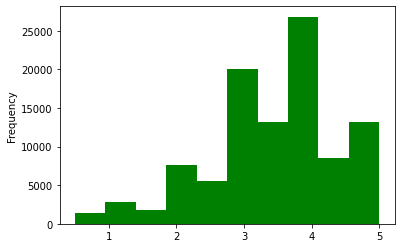

In [11]:
df_notas.nota.plot(kind='hist', color='green');

A nota 5 apareceu diversas vezes; a nota 4,5 menos; a nota 4 é a que mais apareceu. 

Agora - analisar metade notas são > que 3 e a outra metade das notas são < 3

In [12]:
# usando a mediana
df_notas['nota'].median()

3.5

In [13]:
# imprimindo a media e madiana
print(f"Média: {df_notas['nota'].mean()}")
print(f"Mediana: {df_notas['nota'].median()}")

Média: 3.501556983616962
Mediana: 3.5


In [14]:
# descrevendo dados
df_notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

Temos: 100.836 dados;
- média de notas: 3.501556983616962
- mediana: 3.5
- 25% dados (1 quartil): abaixo de 3
- demais: acima de 4.

In [15]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


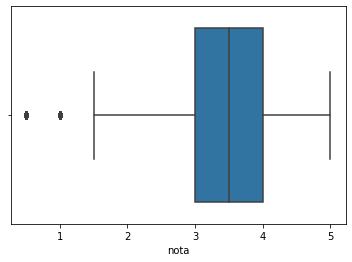

In [16]:
sns.boxplot(df_notas.nota);

A mediana está representada no meio do retângulo azul que é 3,5.<br>
25% está para direita e os outros 25% estão para esquerda.<br>
Entre 3 e 4 => são os demais 25%<br>
Entre 1,5 e 3 temos outros 25%<br>
Metade das avaliações são entre **3** e **4**
 

## Analisando notas por filme

In [17]:
# analisando filmes específicos
df_filmes = pd.read_csv('movies.csv')
df_filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [18]:
df_filmes.columns = ['filmeId', 'titulo', 'generos']
df_filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [19]:
# ver notas do filme Toy Story - Buscar todas as notas do filme 01
df_notas.query('filmeId == 1').nota

0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
        ... 
97364    2.5
98479    4.0
98666    2.5
99497    3.0
99534    5.0
Name: nota, Length: 215, dtype: float64

In [20]:
# media dos dados
df_notas.query('filmeId == 1').nota.mean()

3.9209302325581397

In [21]:
# agrupar por filme
df_notas.groupby('filmeId')

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

In [22]:
medias_por_filme = df_notas.groupby('filmeId').mean().nota
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

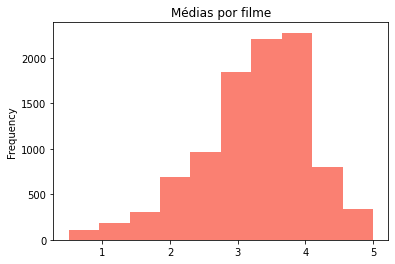

In [23]:
# plotar as notas - ver distribuição das notas
medias_por_filme.plot(kind='hist',
                      title='Médias por filme',
                      color='salmon');

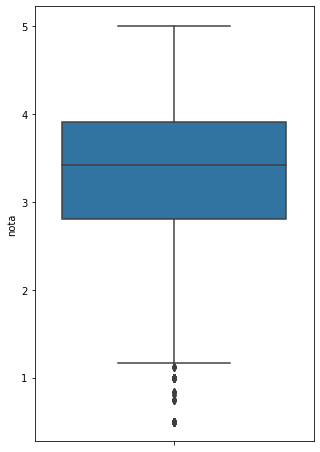

In [24]:
# seaborn no eixo 'y'
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 8))
sns.boxplot(y=medias_por_filme);

In [25]:
# avaliação de media por filme
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


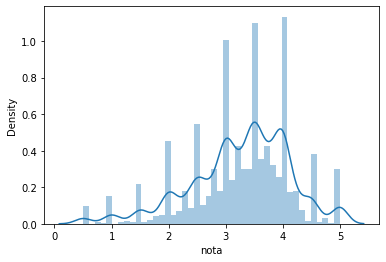

In [26]:
# grafico de distribuição
sns.distplot(medias_por_filme);

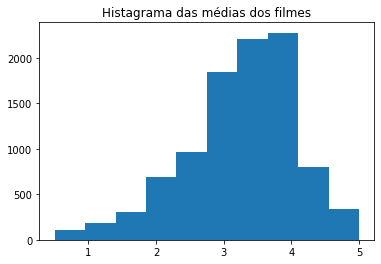

In [27]:
# usando matplotlib
plt.hist(medias_por_filme)
plt.title('Histagrama das médias dos filmes');

## Usando dados de filmes do TMDB 5000

## Informação de algumas colunas

1. **budget** - orçamento do filme
2. **homepage** - página do filme na internet
3. **keywords** - palavras-chave associadas ao filme
4. **original language** - língua original
5. **overview** - descrição inicial
6. **popularity** - nível de popularidade (uma medida própria do TMDB)
7. **release date** - data de lançamento
8. **revenue** - faturamento
9. runtime - duração
10. **vote count** e **vote average** -número de votos e a média das notas

In [28]:
uploaded_tmdb = files.upload()

Saving tmdb_5000_movies.csv to tmdb_5000_movies.csv


In [31]:
df_movies_tmdb = pd.read_csv(io.BytesIO(uploaded_tmdb['tmdb_5000_movies.csv']))
df_movies_tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [32]:
# analisando as linguas - VARIAVEIS CATEGORICAS NOMINAL
df_movies_tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

### Tipos de variáveis:

Variáveis Qualitativas (categóricas) são aquelas que não possuem valores quantitativos, mas, ao contrário, são definidas por várias categorias (nominais ou ordinais).

- Variáveis categóricas nominais: não existe ordenação dentre as categorias. Exemplos: sexo, cor dos olhos, fumante/não fumante, doente/sadio.

- Variáveis categóricas ordinais: existe uma ordenação entre as categorias. Exemplo: escolaridade (primeiro, segundo e terceiro graus), estágios de uma doença (inicial, intermediário, terminal), mês de observação (janeiro, fevereiro, ..., dezembro), etc.

Variáveis Quantitativas  podem ser medidas em uma escala quantitativa, ou seja, apresentam valores numéricos que fazem sentido. Podem ser contínuas ou discretas.

- Variáveis discretas: características mensuráveis que podem assumir apenas um número finito ou infinito contável de valores. Exemplos: número de filhos, número de bactérias por litro de leite, número de cigarros fumados por dia.

- Variáveis contínuas: características mensuráveis que assumem valores em uma escala contínua, valores fracionais fazem sentido. Exemplos: peso (balança), altura (régua), tempo (relógio), pressão arterial, idade.

http://leg.ufpr.br/~silvia/CE055/node8.html

In [33]:
# cotar quantas vezes aparece - .value_counts().to_frame()
# .to_frame() => transforma em dataframe
df_movies_tmdb['original_language'].value_counts().to_frame()

,original_language
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12
ru,11


In [34]:
# acompanhando 2 colunas (as linguas deixam de ser index)
# transformaando uma serie em um dataframe
df_movies_tmdb.original_language.value_counts().to_frame().reset_index()

,index,original_language
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ru,11


In [35]:
contagem_de_lingua = df_movies_tmdb.original_language.value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


## Visualizar as categorias - plotando gráficos

https://seaborn.pydata.org/tutorial/categorical.html

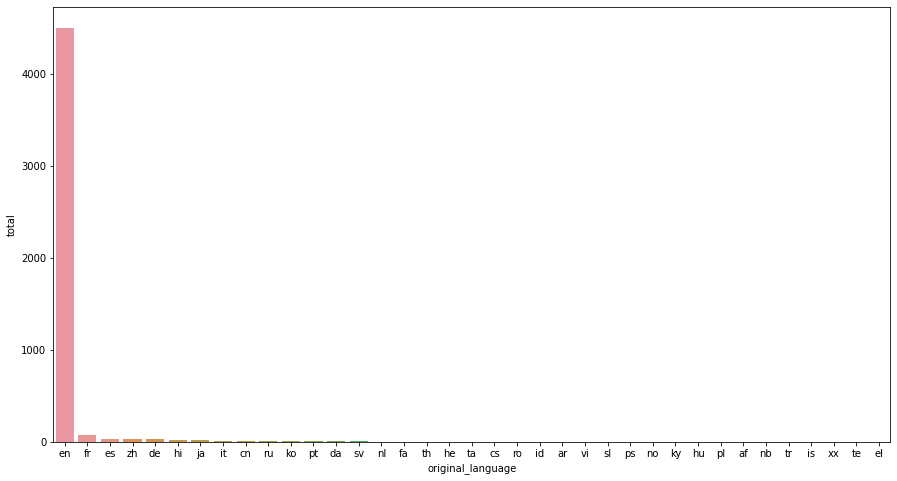

In [36]:
# grafico de barra - barplot
# x - linguas / y - total
plt.figure(figsize = (15,8))
sns.barplot(x="original_language",
            y="total",
            data = contagem_de_lingua);

Usando catplot para analisar dados.

https://seaborn.pydata.org/generated/seaborn.catplot.html

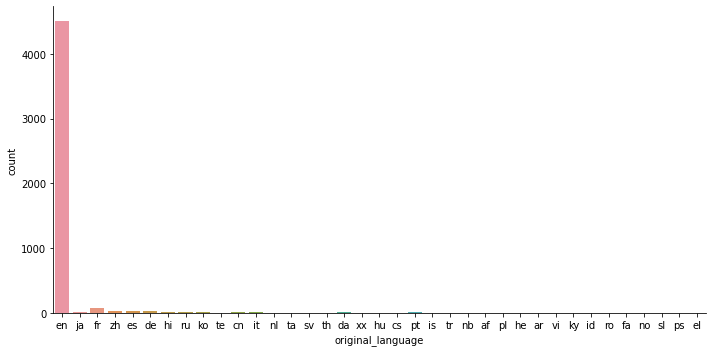

In [37]:
# tipo e plot - kind='count'
sns.catplot(x='original_language',
            aspect=2,
            kind='count',
            data=df_movies_tmdb);

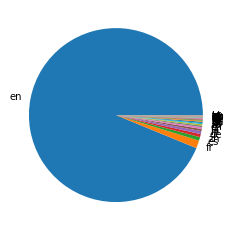

In [38]:
# analisando dados com gráfico de pizza
plt.pie(contagem_de_lingua["total"], labels = contagem_de_lingua["original_language"]);

Nota-se que a visualização dos dados por esse gráfico de 'pizza' não foi satisfatório. Dificuldade em analisar as diferenças proporcionais. 

In [39]:
# localizar as linhas - indice com valor => ingles 'en'
total_por_lingua = df_movies_tmdb["original_language"].value_counts()
total_por_lingua.loc["en"]

4505

In [40]:
total_por_lingua = df_movies_tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)

4505 298


Quantidade de filme por categoria:
1. Inglês - 4505
2. Outros - 298

In [41]:
# criando um dataframe
dados = {
    'lingua' : ['ingles','outros'],
    'total' : [total_de_ingles, total_do_resto]

}

dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


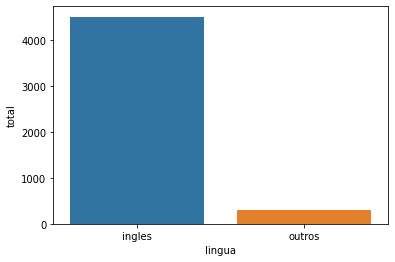

In [42]:
# plotar o dataframe - usando barplot
sns.barplot(data = dados, x = 'lingua', y = 'total');

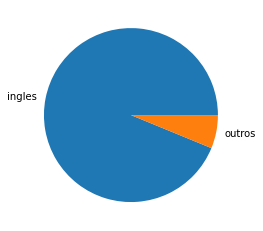

In [43]:
plt.pie(dados["total"], labels = dados["lingua"]);

Comparando ambos gráficos acima:
- gráfico de barras: é possível ter uma noção maior da diferença entre as liguas apresentadas.
- gráfico de 'pizza': a diferença de grandeza é pouco perceptível.

In [44]:
df_movies_tmdb.query("original_language != 'en'").original_language.value_counts()

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: original_language, dtype: int64

In [45]:
total_por_lingua_de_outros_filmes = df_movies_tmdb.query("original_language != 'en'").original_language.value_counts()
total_por_lingua_de_outros_filmes

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: original_language, dtype: int64

In [46]:
filmes_sem_lingua_original_em_ingles = df_movies_tmdb.query("original_language != 'en'")

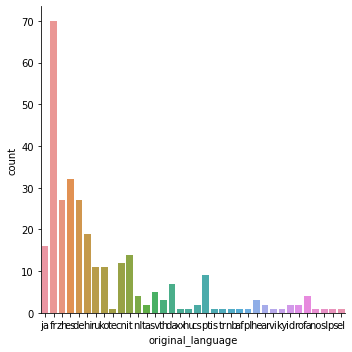

In [47]:
# plotar por categoria
sns.catplot(x = "original_language", data = filmes_sem_lingua_original_em_ingles, kind="count");

#### Refinando o gráfico

palette - cores
http://seaborn.pydata.org/tutorial/color_palettes.html

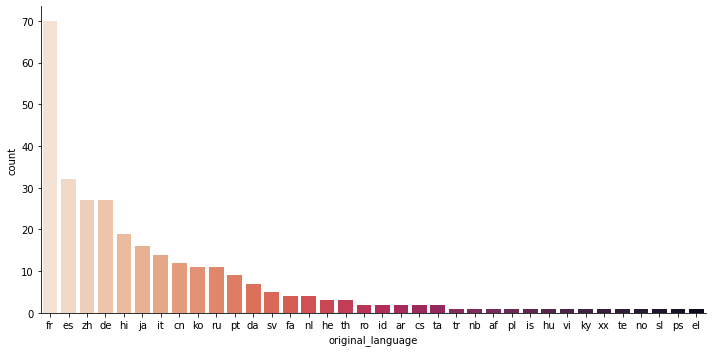

In [48]:
# catplot - aspect
# ordem de colunas (ordenar por aparição) - order
filmes_sem_lingua_original_em_ingles = df_movies_tmdb.query("original_language != 'en'")

sns.catplot(x = "original_language", 
            data = filmes_sem_lingua_original_em_ingles, 
            kind="count", 
            aspect=2,
            order = total_por_lingua_de_outros_filmes.index,
            palette='rocket_r');

## Média, mediana, desvio padrão, boxplot, histograma, tendencia central de dispersão.

In [56]:
df_filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### Analisando filmes: Toy Story e Jumanji

In [49]:
# verificando a quantidade de notas
notas_toy_story = df_notas.query('filmeId==1')
notas_jumanji = df_notas.query('filmeId==2')
print(len(notas_toy_story), len(notas_jumanji))

215 110


In [57]:
# imprimindo a média dos filmes
print(f'Nota média do filme Toy Story: {notas_toy_story.nota.mean():.2f}')
print(f'Nota média do filme Jumanji: {notas_jumanji.nota.mean():.2f}')

Nota média do filme Toy Story: 3.92
Nota média do filme Jumanji: 3.43


In [58]:
# usando a mediana
print(f'Nota mediana do filme Toy Story: {notas_toy_story.nota.median():.2f}')
print(f'Nota mediana do filme Jumanji: {notas_jumanji.nota.median():.2f}')

Nota mediana do filme Toy Story: 4.00
Nota mediana do filme Jumanji: 3.50


Obs.: estamos buscando apenas a média dessas notas. Precisamos ter com mais precisão quais notas foram dadas para cada filme - Ex: quantas notas 5 ou 4 foram dadas para cada filme.<br>
Medidas como média, mediana e moda nos informam como está o comportamento central do que estamos analisando.<br>
Precisamos analisar a distribuição desses dados.

###Visualizando distribuição

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


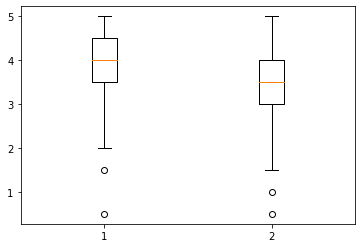

In [59]:
plt.boxplot([notas_toy_story.nota, notas_jumanji.nota]);

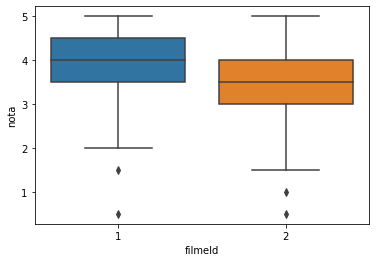

In [60]:
# buscando as notas entre 1 ou 2
sns.boxplot(x = "filmeId", y = "nota", data = df_notas.query("filmeId in (1,2)"));

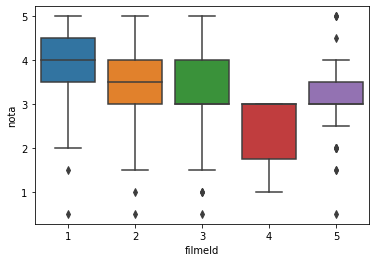

In [61]:
# analisando dentro dos valores com filmeId 1 ao 5)
sns.boxplot(x = "filmeId", y = "nota", data = df_notas.query("filmeId in (1,2,3,4,5)"));

### Desvio padrão - std

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html

In [62]:
# quantos dados estão desviando por padrão - std
print(f'''
Desvio padrão do filme Jumanji: {notas_jumanji.nota.std():.2f}
Desvio padrão do filme Toy Story: {notas_toy_story.nota.std():.2f}
''')


Desvio padrão do filme Jumanji: 0.88
Desvio padrão do filme Toy Story: 0.83



Nota-se que a média  e mais desvio padrão irão mostrar não apenas uma tendência central, mas também de dispersão.
1. Média:
- Filme Toy Story: 3.92
- Filme Jumanji: 3.43
2. Desvio Padrão:
- Filme Jumanji: 0.88
- Filme Toy Story: 0.83

Dispersão estatística

https://pt.wikipedia.org/wiki/Dispers%C3%A3o_estat%C3%ADstica